In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/raw/climate_nasa.csv")  # Adjust path if needed
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]
df.rename(columns={"text": "comment"}, inplace=True)





df.head()


,date,likescount,profilename,commentscount,comment
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [12]:
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

# Text cleaner
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Sentiment score generator
def get_sentiment_scores(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)

# Label classifier
def classify_sentiment(score_dict):
    compound = score_dict["compound"]
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


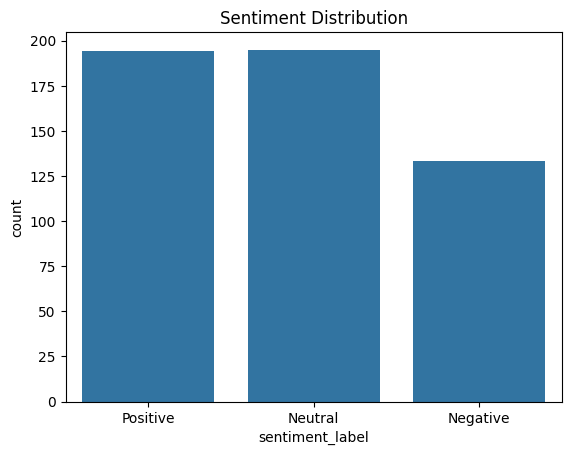

In [13]:
# Apply cleaning
df["clean_comment"] = df["comment"].apply(clean_text)

# Get sentiment scores
df["sentiment_scores"] = df["clean_comment"].apply(get_sentiment_scores)

# Extract compound score
df["compound_score"] = df["sentiment_scores"].apply(lambda x: x["compound"])

# Classify into labels
df["sentiment_label"] = df["sentiment_scores"].apply(classify_sentiment)

# Plot results
import seaborn as sns
sns.countplot(x="sentiment_label", data=df)
plt.title("Sentiment Distribution")
plt.show()
